# Final Project- Jake Dale

Problem: Real estate (houses in particular) is one of the most important asset classes and stores of wealth, yet pricing and valuations are not nearly as transparent as for other assets. Reasons include the fact that houses are not fungible, and market prices are available only when a house is put up for sale. However, many features of a house are observable and measurable at any time.

Proposal: There is a database of houses in Ames, IA (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The data is broken into both a training set and a test set, and in addition to the target variable (house price) to be predicted, there are 79 other features that could have explanatory power over the price. The plan is to analyze the dataset to see if a model can be derived that provides an accurate prediction for the house price as a function of the features, within a certain margin of error.

In [2]:
# Download the necessary libraries and import the data set.

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

path = './housing.csv'
housing = pd.read_csv(path)

In [3]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

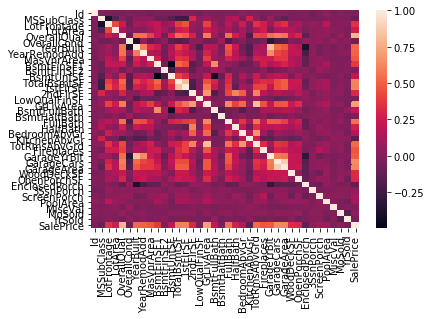

In [6]:
corr = housing.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

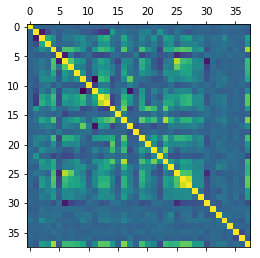

In [7]:
plt.matshow(housing.corr());

In [8]:
#The Kaggle link has a data description attached to go over the meaning of each feature in the dataset.

In [9]:
#There is one feature, MSSubClass that has numerical values, but is in fact a non-ordered categorical feature,
#and will need to be dummy encoded.

housing = pd.get_dummies(housing, columns=['MSSubClass'], drop_first=True)

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 94 columns):
Id                1460 non-null int64
MSZoning          1460 non-null object
LotFrontage       1201 non-null float64
LotArea           1460 non-null int64
Street            1460 non-null object
Alley             91 non-null object
LotShape          1460 non-null object
LandContour       1460 non-null object
Utilities         1460 non-null object
LotConfig         1460 non-null object
LandSlope         1460 non-null object
Neighborhood      1460 non-null object
Condition1        1460 non-null object
Condition2        1460 non-null object
BldgType          1460 non-null object
HouseStyle        1460 non-null object
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
YearBuilt         1460 non-null int64
YearRemodAdd      1460 non-null int64
RoofStyle         1460 non-null object
RoofMatl          1460 non-null object
Exterior1st       1460 non-null object
Ext

In [11]:
#There are some text-encoded categorical features that are ordered, and can therefore be numerically encoded.
#Ten of them use the same Excellent to Poor rating scheme, so we can loop through them and map.
ordinal_columns=[]
quality_mappings = {'Ex': 5, 'Gd': 4 , 'TA': 3 , 'Fa' : 2 ,  'Po' : 1 , 'NA' : 0}

for column in housing:
    if 'TA' in housing[column].value_counts() or 'Ex' in housing[column].value_counts():
            ordinal_columns.append(column)

for column in ordinal_columns:
    housing[column]=housing[column].map(quality_mappings)

#Two features, regarding the basement finish type, have a slightly different ratings scheme.

basement_columns=['BsmtFinType1', 'BsmtFinType2']
basement_mappings= {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3,'LwQ':2, 'Unf':1, 'NA':0}

for column in basement_columns:
    housing[column]=housing[column].map(basement_mappings)
    
#There are then several features with unique ratings scales, mapped separately from the others.
#They are BsmtExposure, Functional, LandSlope, GarageFinish, PavedDrive, LotShape.

exposure_mappings= {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
housing['BsmtExposure']=housing['BsmtExposure'].map(exposure_mappings)

functional_mappings= {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, 'NA': 0}
housing['Functional']=housing['Functional'].map(functional_mappings)

landslope_mappings= {'NA':0, 'Gtl':1, 'Mod':2, 'Sev':3}
housing['LandSlope']=housing['LandSlope'].map(landslope_mappings)

garage_mappings= {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}
housing['GarageFinish']=housing['GarageFinish'].map(garage_mappings)

paved_mappings={'Y':2, 'P':1, 'N':0}
housing['PavedDrive']=housing['PavedDrive'].map(garage_mappings)

lot_mappings= {'IR3':3, 'IR2':2, 'IR1':1, 'Reg':0}
housing['LotShape']=housing['LotShape'].map(lot_mappings)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 94 columns):
Id                1460 non-null int64
MSZoning          1460 non-null object
LotFrontage       1201 non-null float64
LotArea           1460 non-null int64
Street            1460 non-null object
Alley             91 non-null object
LotShape          1460 non-null int64
LandContour       1460 non-null object
Utilities         1460 non-null object
LotConfig         1460 non-null object
LandSlope         1460 non-null int64
Neighborhood      1460 non-null object
Condition1        1460 non-null object
Condition2        1460 non-null object
BldgType          1460 non-null object
HouseStyle        1460 non-null object
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
YearBuilt         1460 non-null int64
YearRemodAdd      1460 non-null int64
RoofStyle         1460 non-null object
RoofMatl          1460 non-null object
Exterior1st       1460 non-null object
Exter

In [13]:
#The remaining features with datatype=object cannot sensibly be ordered, so we will use dummy encoding on the rest.

dummy_features=[]

for column in housing:
    if housing[column].dtype==object:
        dummy_features.append(column)

for column in dummy_features:
    housing=pd.get_dummies(housing, columns=[column], drop_first=True)

In [14]:
housing.describe()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,0.408219,1.062329,6.099315,5.575342,1971.267808,1984.865753,103.685262,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,24.284752,9981.264932,0.582296,0.276232,1.382997,1.112799,30.202904,20.645407,181.066207,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,59.000000,7553.500000,0.000000,1.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,69.000000,9478.500000,0.000000,1.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,80.000000,11601.500000,1.000000,1.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,313.000000,215245.000000,3.000000,3.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#First, calculate the Sale Price mean and RMSE, so we'll have a base model to compare with later results.
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = housing.columns.drop('SalePrice')
y= housing.SalePrice
X= housing[feature_cols]

# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())

print y_test.mean()
np.sqrt(metrics.mean_squared_error(y_test, y_null))


183078.819178


77656.195531012636

In [21]:
#Next, we will create a Random Forest Model to improve upon the 

from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [25]:
X.dtypes

Id                         int64
LotFrontage              float64
LotArea                    int64
LotShape                   int64
LandSlope                  int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
ExterQual                  int64
ExterCond                  int64
BsmtQual                 float64
BsmtCond                 float64
BsmtExposure             float64
BsmtFinType1             float64
BsmtFinSF1                 int64
BsmtFinType2             float64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
HeatingQC                  int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
          